# Introduction to neural networks classification with TensorFlow

A few types of classification problem:
1. Binary Classification
2. Multiclass Classification
3. Multilabel Classification


## Creating data to view and fit

In [54]:
 from sklearn.datasets import make_circles

 # Create 1000 samples
 n_samples = 1000

# Make circle
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [55]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [56]:
# Check out the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

### Right now the data looks pretty obscure.. Let's visualize it

In [57]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


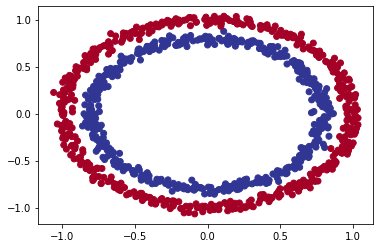

In [58]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

## Input and Output shapes

In [59]:
# Check shapes of features and label
X.shape, y.shape

((1000, 2), (1000,))

In [60]:
# How many samples we are working with
len(X), len(y)

(1000, 1000)

## Steps in modelling

1. Create the model
2. Compile the model
3. Fit the model
4. Evaluate the model

In [61]:
# Import tensorflow
import tensorflow as tf

In [62]:
# Set the random seed
tf.random.set_seed = 42

# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 4.3079 - accuracy: 0.4550
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 4.2880 - accuracy: 0.4580
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 4.2860 - accuracy: 0.4580
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 4.2849 - accuracy: 0.4590
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 4.2837 - accuracy: 0.4590


In [63]:
# Let's try and improve our model
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.7427 - accuracy: 0.4910


[0.7427083849906921, 0.4909999966621399]

Currently ourr model is performing as if it is guessing. Let's try and increase input layers

In [64]:
# Set random state 
tf.random.set_seed = 42

# 1. Create a new model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [65]:
# Let's evaluate the new model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

# Improving our model

In [66]:
# Let's create another model with different activation function
# Set the random seed
tf.random.set_seed = 42

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, ),
    tf.keras.layers.Dense(10, ),
    tf.keras.layers.Dense(1, )
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [67]:
# Evaluate the new model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6956 - accuracy: 0.4820


[0.6955749988555908, 0.4819999933242798]

Let's plot a function named plot decision boundary to plot the predictions

In [68]:
import numpy as np

def plot_decision_boundary(model, X, y):
    """
    Plots a decision boundary by predicting a model on X.
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    
    # Create X values (we're going to predict on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
    
    # Make predictions using the trained model
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
      print("doing multiclass classification...")
      # We have to reshape our predictions to get them ready for plotting
      y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
      print("doing binary classifcation...")
      y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

doing binary classifcation...


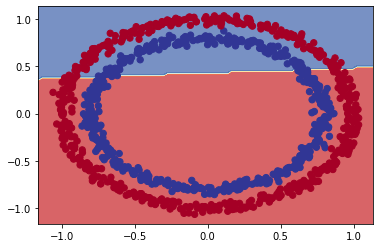

In [69]:
# Check out the predictions our model is making 
plot_decision_boundary(model_3, X, y)

In [70]:
# Let's see if our model can be used for a regression problem

tf.random.set_seed = 42

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

# Split our data into train and test set
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Let's check the shapes
X_reg_train.shape, X_reg_test.shape, y_reg_train.shape, y_reg_test.shape

(TensorShape([150]), TensorShape([50]), TensorShape([150]), TensorShape([50]))

In [71]:
# Fit our model_3 with regression data
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

That didn't work! The reason is we trained our model for binary classification. That is why we got the shape issue.

In [72]:
# Let's set up the model same way for regression problem
# Set up random seed
tf.random.set_seed = 42

# 1. Create a model
model_4 = tf.keras.Sequential([
      tf.keras.layers.Dense(100),
      tf.keras.layers.Dense(10),
      tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_4.fit(X_reg_train, y_reg_train, epochs=100, verbose = 0)

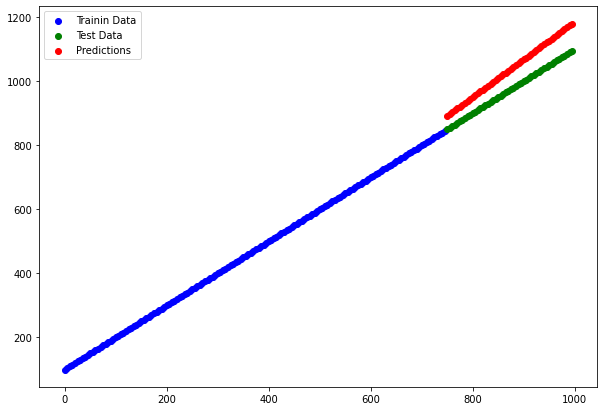

In [73]:
# Make predictions using the test data
y_reg_pred = model_4.predict(X_reg_test)

# Plot the figure
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Trainin Data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test Data")
plt.scatter(X_reg_test, y_reg_pred, c="r", label="Predictions")
plt.legend();

## The missing piece: Non-Linearity

In [74]:
# Set the random seed
tf.random.set_seed = 42

# 1. Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation="relu"),
    tf.keras.layers.Dense(2, activation="relu")
    # tf.keras.layers.Dense(1, activation="tanh")
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=1000, verbose=0)

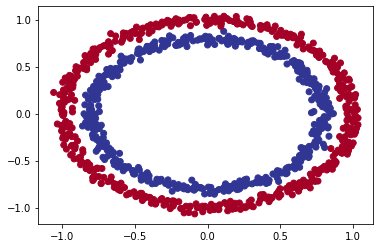

In [75]:
# Check how the data looks like
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

doing multiclass classification...


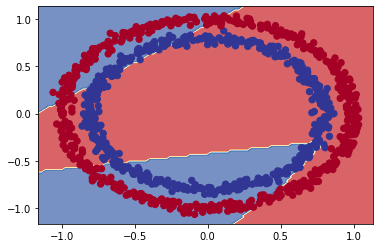

In [76]:
# Check the decision boundary for the new model
plot_decision_boundary(model_5, X, y)

In [77]:
# Let's try with different neurons
# Set random seed
tf.random.set_seed = 42

# 1. Create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=300, verbose=0)

doing binary classifcation...


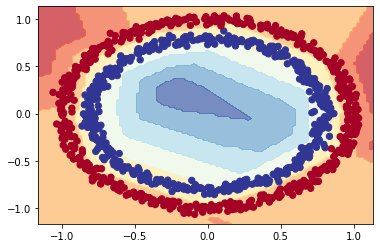

In [78]:
# let's plot a decision boundary for this model
plot_decision_boundary(model_6, X, y)

In [79]:
# This time let's add an activation function in the output layer
tf.random.set_seed = 42

# 1. Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_7.fit(X, y, epochs=300, verbose=0)

doing binary classifcation...


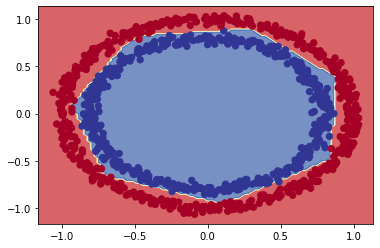

In [80]:
plot_decision_boundary(model_7, X, y)

In [81]:
# Let's evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0479 - accuracy: 0.9940


[0.04788222536444664, 0.9940000176429749]

In [82]:
# Create a tensor similar to that we passed into the model
A = tf.cast(tf.range(-10, 10), dtype=tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

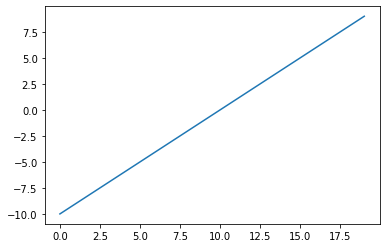

In [83]:
# Plot the tensor
plt.plot(A);

In [84]:
#Let's define a sigmoid function
def sigmoid(X):
  return 1/ (1 + tf.exp(-X))

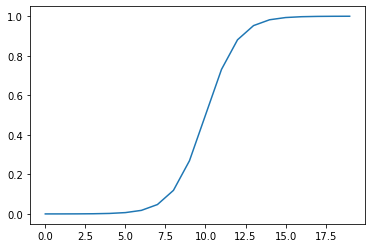

In [85]:
# Use the sigmoid function on our tensor and plot it
plt.plot(sigmoid(A));


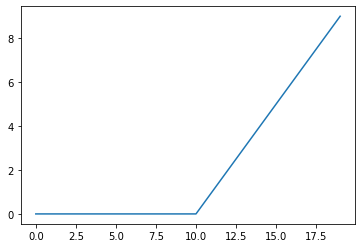

In [86]:
plt.plot(tf.keras.activations.relu(A))

## Evaluating and improving our classification

So far we have trained and predicted on the same data set. Now let's create a separate train and test data set for our model to predict on.

In [87]:
# Check how many samples we have
len(X)

1000

In [88]:
# Split the data by indexing
X_train, X_test = X[:800], X[800:]
y_train, y_test = y[:800], y[800:]

In [89]:
# Let's recreate a model to fit on the training data and evaluate on the test data
# Set the random seed
tf.random.set_seed = 42

# 1. Create a model
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=100, verbose=0)

In [90]:
# 4. Evaluate the model on test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0392 - accuracy: 0.9850


[0.03917562589049339, 0.9850000143051147]

doing binary classifcation...
doing binary classifcation...


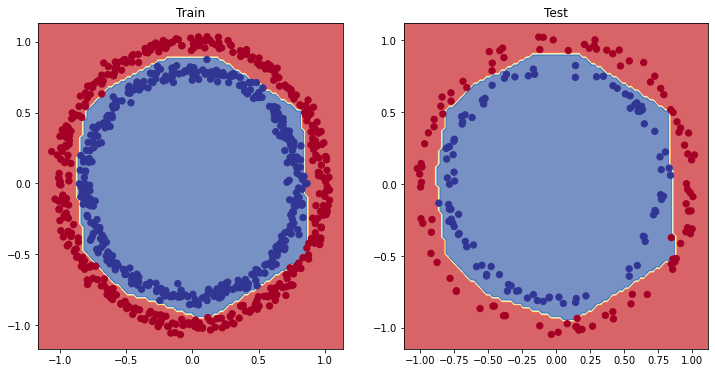

In [91]:
# Plot the decision boundaries for train and test data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model=model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model=model_8, X=X_test, y=y_test)

## Plot the loss curves

In [92]:
# Convert the history object into a dataframe
hist_df = pd.DataFrame(history.history)
hist_df

,loss,accuracy
0,0.692822,0.47500
1,0.687388,0.54250
2,0.681134,0.60125
3,0.674202,0.59875
4,0.662277,0.71000
...,...,...
95,0.026655,0.99500
96,0.025614,0.99500
97,0.057077,0.98000
98,0.034406,0.99125


Text(0.5, 1.0, 'Model_8 training curves')

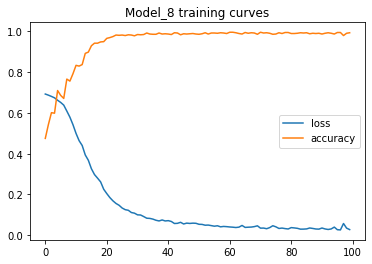

In [93]:
# Plot the loss curves
hist_df.plot()
plt.title("Model_8 training curves")

## Finding the ideal learning rate

To find the ideal learning rate(the learning rate at which the the loss function decreases the most during training) we are going to use the following steps:

1. A learning rate **callback** - callback can be thought of an extra piece of functionality that can be added while the model is learning.
2. Another model
2. A modified loss curves plot

In [94]:
# Set random seed
tf.keras.set_seed=42

# 1. Create a model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
    ])

# 2. Compile a model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create a learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

#3. Fit the model
history_9 = model_9.fit(X_train,y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7145 - accuracy: 0.4963
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7135 - accuracy: 0.4925
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7126 - accuracy: 0.4913
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7114 - accuracy: 0.4900
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7104 - accuracy: 0.4875
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7091 - accuracy: 0.4850
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7080 - accuracy: 0.4875
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7068 - accuracy: 0.4875
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7057 - accuracy: 0.4863
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7046 - accuracy: 0.4812
Epoch 11/

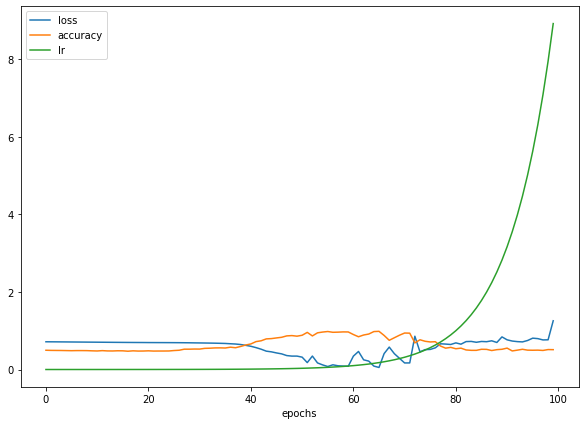

In [95]:
# Let's plot the new history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs")

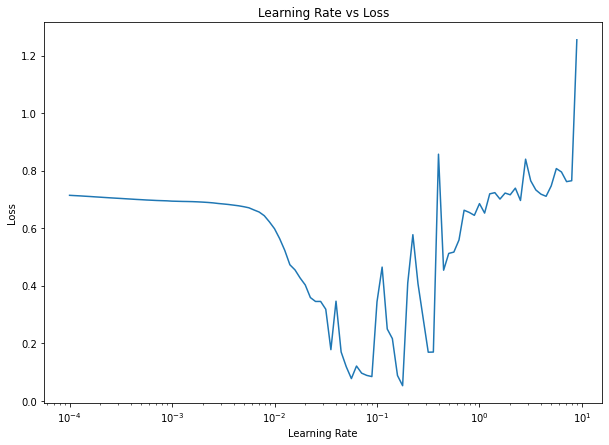

In [96]:
# Plot the learning rate vs loss
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss");

We should ideally take a learning rate in which the loss function is still decreasing and still haven't reached the lowest point in the curve. From the figure above we can expect it to be around `0.01`

In [97]:
# Let's build another model
# Set the random seed 
tf.random.set_seed = 42

# 1. Create a model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the mdoel
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

# 3. Fit the model
history_10 = model_10.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 1ms/step - loss: 0.7002 - accuracy: 0.4988
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4800
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5013
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6872 - accuracy: 0.5387
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6844 - accuracy: 0.5325
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6784 - accuracy: 0.5600
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6592 - accuracy: 0.6012
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6416 - accuracy: 0.6363
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6181 - accuracy: 0.6450
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5844 - accuracy: 0.6800
Epoch 11/25
25/25 [

In [98]:
# Evaluate the model on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0550 - accuracy: 0.9900


[0.055013593286275864, 0.9900000095367432]

doing binary classifcation...
doing binary classifcation...


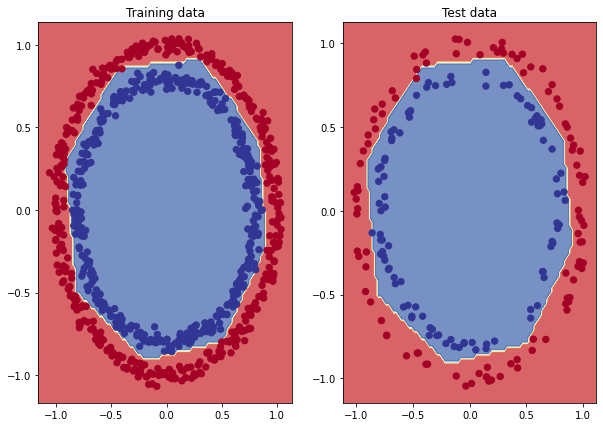

In [99]:
# Plot the decision boundaries for training and test set
plt.figure(figsize=(10, 7))
plt.subplot(1, 2, 1)
plt.title("Training data")
plot_decision_boundary(model_10, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test data")
plot_decision_boundary(model_10, X_test, y_test)

## More classification evaluation methods

In [100]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model has loss of: {loss}")
print(f"Model has accuracy of: {accuracy}")

7/7 [==============================] - 0s 2ms/step - loss: 0.0550 - accuracy: 0.9900
Model has loss of: 0.055013593286275864
Model has accuracy of: 0.9900000095367432


In [101]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create a confusion matrix
# confusion_matrix(y_test, y_preds)

That didn't work well! Because the **sigmoid** activation function outputs values in probability format. We need to change them to binary format.

In [102]:
y_test[:10], tf.round(y_preds[:10])

(array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0]),
 <tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.]], dtype=float32)>)

In [103]:
# Create another confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[100,   1],
       [  1,  98]])

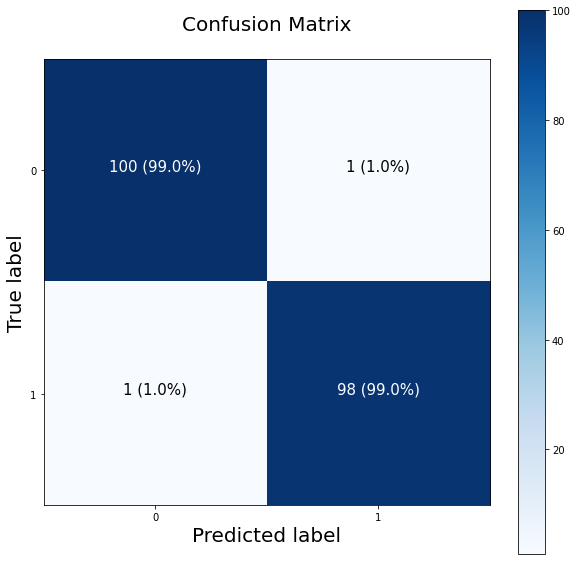

In [107]:
# Write code to draw confusion matrix
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)